In [9]:
import mgd
import os
import pandas as pd
import torchaudio
import torchaudio.transforms as transforms
import utils
import cnn
import torch.nn as nn
import torch.optim as optim

In [10]:
AUDIO_DIR = os.path.expanduser("/Users/noramendoza/Desktop/DL_project/data/fma_small")
TRACKS_FILE = utils.load("/Users/noramendoza/Desktop/DL_project/TRACKS.csv")
TRACKS_FILE.head()

,track_id,genre_top
0,2,Hip-Hop
2,5,Hip-Hop
3,10,Pop
15,140,Folk
16,141,Folk


Create dataset containing *spectrograms* of song tracks and their *labels*

In [11]:
music_data = mgd.MusicGenreDataset(AUDIO_DIR, TRACKS_FILE)
print(f"There are {len(music_data)} samples in the dataset.")

There are 8000 samples in the dataset.


In [12]:
audio, audio_label = music_data[3]

In [13]:
spectro_data = mgd.MusicGenreDataset(AUDIO_DIR, TRACKS_FILE, apply_spectrogram=True)
spectrogram, spectrogram_label = spectro_data[3]

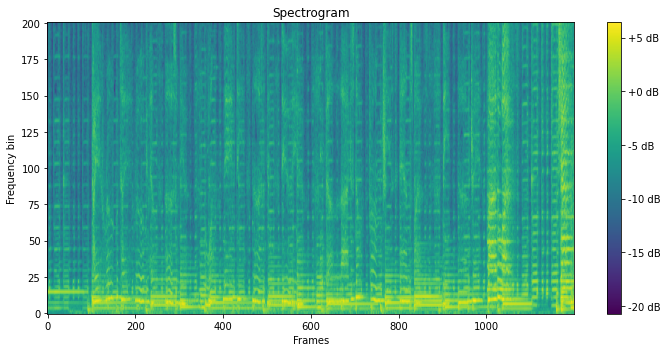

In [14]:
utils.plot_spectrogram(spectrogram) # si queremos printar el spectrograma en grayscal: plt.imshow(... cmap='gray'...)

Split the data into train, validation and test set and create dataloaders

In [15]:
train_dataset, val_dataset, test_dataset, train_dataloader, val_dataloader, test_dataloader= utils.splits_n_dataloaders(spectro_data)

# Print the shapes of the resulting DataFrames
print("Train set:", len(train_dataset), " (80% of data)")
print("Validation set shape:", len(val_dataset), " (20% of data)")
print("Test set shape:", len(test_dataset), " (20% of data)")

Train set: 6400  (80% of data)
Validation set shape: 800  (20% of data)
Test set shape: 800  (20% of data)


Load and train the model 

In [16]:
model = cnn.ConvNN(kernels=[16, 32], classes=8)

criterion = nn.CrossEntropyLoss()

learning_rate = 0.001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

num_epochs = 15

cnn.train_model(model, train_dataloader, test_dataloader, criterion, optimizer, num_epochs)

AttributeError: Caught AttributeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/Users/noramendoza/Library/Python/3.8/lib/python/site-packages/torch/utils/data/_utils/worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)
  File "/Users/noramendoza/Library/Python/3.8/lib/python/site-packages/torch/utils/data/_utils/fetch.py", line 51, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/Users/noramendoza/Library/Python/3.8/lib/python/site-packages/torch/utils/data/_utils/fetch.py", line 51, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/Users/noramendoza/Library/Python/3.8/lib/python/site-packages/torch/utils/data/dataset.py", line 298, in __getitem__
    return self.dataset[self.indices[idx]]
  File "/Users/noramendoza/Desktop/DL_project/mgd.py", line 31, in __getitem__
    audio = AudioSegment.from_mp3(audio_sample_path)
  File "/Users/noramendoza/Library/Python/3.8/lib/python/site-packages/pydub/audio_segment.py", line 796, in from_mp3
    return cls.from_file(file, 'mp3', parameters=parameters)
  File "/Users/noramendoza/Library/Python/3.8/lib/python/site-packages/pydub/audio_segment.py", line 723, in from_file
    stdin_data = file.read()
AttributeError: 'NoneType' object has no attribute 'read'
